<a href="https://colab.research.google.com/github/kimsijin33/-AI-/blob/main/%EC%83%9D%EB%AC%BC%ED%95%99%EC%A0%81_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EA%B3%A0%EC%9C%A0_%EC%8A%A4%ED%8E%99%ED%8A%B8%EB%9F%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 뉴런 이름
neurons = ["AVA", "AVD", "AVE", "PVC", "RIM"]

# 5x5 연결 행렬 A 정의 (방향성 포함)
A = np.array([
    [0, 1, 1, 0, 0],  # AVA → AVD, AVE
    [1, 0, 1, 0, 0],  # AVD → AVA, AVE
    [0, 0, 0, 1, 0],  # AVE → PVC
    [0, 0, 1, 0, 1],  # PVC → AVE, RIM
    [0, 0, 0, 0, 0]   # RIM
])

# 대칭화된 행렬 A_sym = A + A^T
A_sym = A + A.T

/tmp/ipython-input-2-2758996042.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


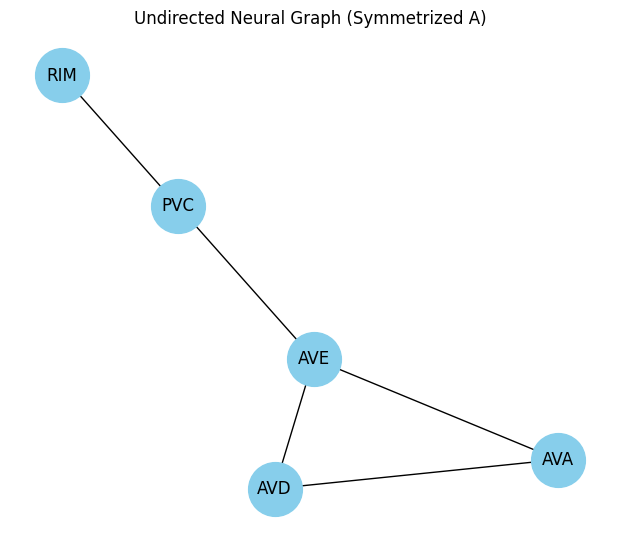

In [ ]:
G_sym = nx.Graph()
G_sym.add_nodes_from(neurons)

# 대칭 행렬 A_sym 기준으로 엣지 추가
for i in range(5):
    for j in range(i+1, 5):
        if A_sym[i, j] > 0:
            G_sym.add_edge(neurons[i], neurons[j])

# 시각화
pos = nx.spring_layout(G_sym, seed=42)
plt.figure(figsize=(6, 5))
nx.draw(G_sym, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=12)
plt.title("Undirected Neural Graph (Symmetrized A)")
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
print(A_sym)

[[0 2 1 0 0]
 [2 0 1 0 0]
 [1 1 0 2 0]
 [0 0 2 0 1]
 [0 0 0 1 0]]


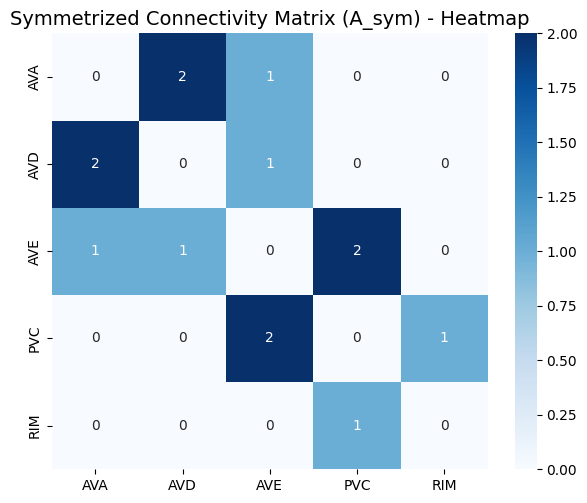

In [ ]:
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(A_sym, annot=True, cmap="Blues", xticklabels=neurons, yticklabels=neurons, cbar=True, square=True)

plt.title("Symmetrized Connectivity Matrix (A_sym) - Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

고유값:
[ 3.15042174  1.45983735 -0.17885438 -2.         -2.43140471]
고유벡터:
[[ 4.96933066e-01  4.40739386e-01  1.90136405e-01  7.07106781e-01
   1.50514016e-01]
 [ 4.96933066e-01  4.40739386e-01  1.90136405e-01 -7.07106781e-01
   1.50514016e-01]
 [ 5.71682603e-01 -2.38070954e-01 -4.14279538e-01 -5.55111512e-17
  -6.66988521e-01]
 [ 4.03587583e-01 -6.14511821e-01 -1.53088550e-01  2.22044605e-16
   6.60345501e-01]
 [ 1.28105891e-01 -4.20945402e-01  8.55939633e-01 -1.11022302e-16
  -2.71590121e-01]]


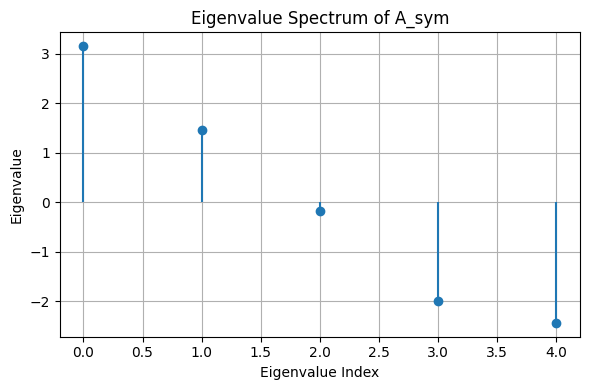

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(A_sym)  # 고유값과 고유벡터 함께 계산

# 고유값을 내림차순으로 정렬하고 그에 맞게 고유벡터도 재정렬
idx = eigenvalues.argsort()[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print("고유값:")
print(eigenvalues_sorted)
print("고유벡터:")
print(eigenvectors_sorted)

# 고유값 스펙트럼 시각화
plt.figure(figsize=(6, 4))
plt.stem(eigenvalues_sorted, basefmt=" ")
plt.title("Eigenvalue Spectrum of A_sym")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.tight_layout()
plt.show()